**Let's dive into the XOR problem with a 2-layer neural network using NumPy. This is a great exercise to understand why activation functions are crucial in neural networks.**

**Overview of the Solution**

* **The core of this task is to demonstrate that a single-layer neural network (a simple linear model) can't solve the XOR problem, but a 2-layer network with a non-linear activation function can.**



### **Steps:**

**Generate the Data:** We'll create the logical XOR dataset with inputs (X) and corresponding outputs (y).

* **Part 1:** Linear Model: We'll build a single-layer "network" (just a linear classifier) and try to train it. We'll see that it fails to separate the data correctly.

* **Part 2:** 2-Layer Neural Network with Activation Function: We'll build a two-layer network, incorporating a hidden layer with a non-linear activation function (like ReLU or Sigmoid). We'll train this network and see that it successfully learns to solve the XOR problem.

* **This process will visually and computationally demonstrate the need for a non-linear activation function to solve non-linear problems.**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Generate a XOR dataset

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype='float32')
y = np.array([[0],[1],[1],[0]],dtype='float32')

In [8]:
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

X shape : (4, 2)
y shape : (4, 1)


In [14]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [20]:
y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

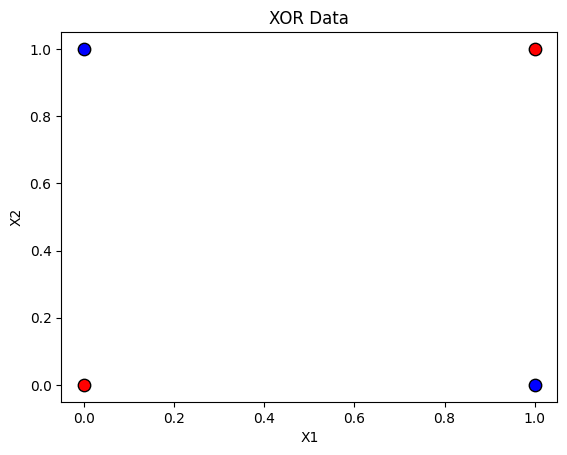

In [18]:
for i in range(len(X)):
    x1 = X[i][0]   # feature 1
    x2 = X[i][1]   # feature 2
    label = y[i][0]  # scalar instead of array

    plt.scatter(x1, x2, c='r' if label == 0 else 'b', s=80, edgecolors='k')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Data")
plt.show()

# **1 layer Model (no @ function used)**

**Linear Model Setup**
* The model is a simple linear classifier: y = Xw + b
* We'll initialize weights and bias randomly

In [46]:
input_dim = 2 #X shape
output_dim = 1 #y shape
learning_rate = 0.01
epochs = 1000

### intialize random weights and bias for 1 layer
W = np.random.randn(input_dim,output_dim)
b = np.zeros((1,output_dim))

# training
for epoch in tqdm(range(epochs)):
    #1 forward pass:
    z = np.dot(X,W) + b
    y_pred = z

    #2  calulate the loss
    loss = np.mean((y_pred - y)**2)

    #3 loss backwards
    d_y_pred = 2 * (y_pred - y) / len(X)
    dW = np.dot(X.T,d_y_pred)
    db = np.sum(d_y_pred, axis = 0, keepdims = True)

    # 4 update params
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    #printing
    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Loss : {loss:.4f}")


100%|██████████| 1000/1000 [00:00<00:00, 27776.85it/s]

Epoch : 0 | Loss : 0.4044
Epoch : 100 | Loss : 0.3077
Epoch : 200 | Loss : 0.2766
Epoch : 300 | Loss : 0.2627
Epoch : 400 | Loss : 0.2562
Epoch : 500 | Loss : 0.2531
Epoch : 600 | Loss : 0.2516
Epoch : 700 | Loss : 0.2508
Epoch : 800 | Loss : 0.2504
Epoch : 900 | Loss : 0.2502


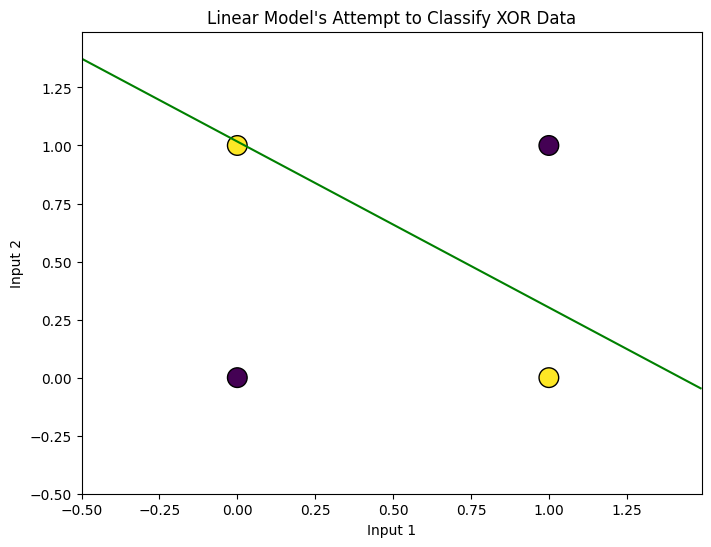


Final Predictions:
[[0.]
 [0.]
 [0.]
 [1.]]


In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis', s=200, edgecolors='k')
plt.title("Linear Model's Attempt to Classify XOR Data")
plt.xlabel("Input 1")
plt.ylabel("Input 2")

# Plot the decision boundary
# The decision boundary is defined by the line Xw + b = 0.5 (or any constant threshold)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='g')

plt.show()

print("\nFinal Predictions:")
final_predictions = np.round(np.dot(X, W) + b)
print(final_predictions)

## **Model - 2 using an @ function : Sigmoid**

### define Sigmoid

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)


### Making another model

In [55]:
input_dim = 2
hidden_dim = 4 # hyperparameter
output_dim = 1
learning_rate = 0.1
epochs = 10000 #(for better convergence)

#initalize random weights
W1 =  np.random.randn(input_dim,hidden_dim) #Weights for the hidden layer
b1 = np.zeros((1,hidden_dim)) # Bias for the hidden layer

W2 = np.random.randn(hidden_dim,output_dim) # Weights for the output layer
b2 = np.zeros((1,output_dim)) # Bias for the output layer

### Training model

 14%|█▍        | 1445/10000 [00:00<00:00, 14449.81it/s]

Epoch 0, Loss: 0.0009
Epoch 1000, Loss: 0.0008
Epoch 2000, Loss: 0.0008


 58%|█████▊    | 5769/10000 [00:00<00:00, 14042.95it/s]

Epoch 3000, Loss: 0.0007
Epoch 4000, Loss: 0.0007
Epoch 5000, Loss: 0.0007


 72%|███████▏  | 7176/10000 [00:00<00:00, 13856.18it/s]

Epoch 6000, Loss: 0.0007
Epoch 7000, Loss: 0.0006
Epoch 8000, Loss: 0.0006


100%|██████████| 10000/10000 [00:00<00:00, 12626.27it/s]


Epoch 9000, Loss: 0.0006


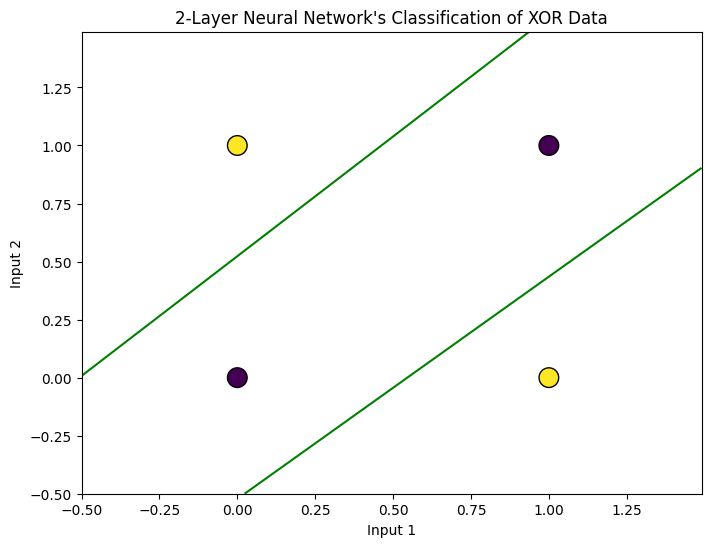


Final Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


In [58]:
for epoch in tqdm(range(epochs)):

    ### Forward pass

    z1 = np.dot(X,W1) + b1     # hidden layer
    a1 = sigmoid(z1) ### Activation function

    z2 = np.dot(a1,W2) + b2
    y_pred = sigmoid(z2) # @ fn on output too

    #loss fn (BCE)
    loss = -np.mean(y * np.log(y_pred) + (1-y) * np.log(1- y_pred))


    # backprop
    d_y_predictions = (y_pred - y) / (y_pred * (1 - y_pred))  # derivative of BCE
    d_z2 = d_y_predictions * sigmoid_derivative(y_pred) # chain rule

    dW2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)
    
    # Hidden layer gradients
    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    
    dW1 = np.dot(X.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 5. Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis', s=200, edgecolors='k')
plt.title("2-Layer Neural Network's Classification of XOR Data")
plt.xlabel("Input 1")
plt.ylabel("Input 2")

# Plot the decision boundary for the 2-layer network
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the trained network to predict values for the mesh grid
Z1 = np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
Z = sigmoid(Z2)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='g')

plt.show()

print("\nFinal Predictions:")
final_predictions = np.round(y_pred)
print(final_predictions)
    

